<a href="https://colab.research.google.com/github/nw93929/introduction-to-github/blob/main/VizLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/nw93929/DS2002FinalProject

Cloning into 'DS2002FinalProject'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 5.06 MiB | 11.36 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
import pandas as pd
import folium
import geopandas as gpd

# Load the dataset
geo_data = gpd.read_file('/content/DS2002FinalProject/Data/counties.geojson.txt')
winners_data = pd.read_excel('/content/DS2002FinalProject/Data/WinningPartyByCounties.xlsx')
geo_data['NAME'] = geo_data['NAME'].str.upper()
merged_data = geo_data.merge(winners_data, left_on='NAME', right_on='county_name')
states_to_keep = ["AZ", "MI", "GA", "WI", "NV", "NC", "PA"] #only including the swing states in 2020
winners_data = winners_data[winners_data['state_po'].isin(states_to_keep)]
winners_data.head()

year    state state_po county_name  county_fips        office  \
0  2012  ARIZONA       AZ      APACHE         4001  US PRESIDENT   
1  2012  ARIZONA       AZ     COCHISE         4003  US PRESIDENT   
2  2012  ARIZONA       AZ    COCONINO         4005  US PRESIDENT   
3  2012  ARIZONA       AZ        GILA         4007  US PRESIDENT   
4  2012  ARIZONA       AZ      GRAHAM         4009  US PRESIDENT   

      candidate       party  candidatevotes  totalvotes   version   mode  
0  BARACK OBAMA    DEMOCRAT           17147       25848  20220315  TOTAL  
1   MITT ROMNEY  REPUBLICAN           29497       49003  20220315  TOTAL  
2  BARACK OBAMA    DEMOCRAT           29257       51731  20220315  TOTAL  
3   MITT ROMNEY  REPUBLICAN           13455       21528  20220315  TOTAL  
4   MITT ROMNEY  REPUBLICAN            8076       11855  20220315  TOTAL

In [ ]:
# format party codes 0 for DEM 1 for REP
merged_data['party_code'] = merged_data['party'].astype('category').cat.codes
merged_data2 = merged_data.groupby('state')['party_code'].mean().reset_index()
merged_data = merged_data.merge(merged_data2, left_on='state', right_on='state')

In [ ]:
merged_data['party_code_y'].value_counts()
merged_data2.value_counts()
merged_data

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID      NAME LSAD  \
0         37      181  01008591  0500000US37181  37181     VANCE   06   
1         37      181  01008591  0500000US37181  37181     VANCE   06   
2         37      181  01008591  0500000US37181  37181     VANCE   06   
3         50      011  01461762  0500000US50011  50011  FRANKLIN   06   
4         50      011  01461762  0500000US50011  50011  FRANKLIN   06   
...      ...      ...       ...             ...    ...       ...  ...   
6613      13      073  00348865  0500000US13073  13073  COLUMBIA   06   
6614      13      073  00348865  0500000US13073  13073  COLUMBIA   06   
6615      13      073  00348865  0500000US13073  13073  COLUMBIA   06   
6616      13      073  00348865  0500000US13073  13073  COLUMBIA   06   
6617      13      073  00348865  0500000US13073  13073  COLUMBIA   06   

           ALAND     AWATER  \
0      653705784   42187365   
1      653705784   42187365   
2      653705784   42187365   
3     1641633748  150930318   
4     1641633748  150930318   
...          ...        ...   
6613   751323672   45373097   
6614   751323672   45373097   
6615   751323672   45373097   
6616   751323672   45373097   
6617   751323672   45373097   

                                               geometry  ...  county_fips  \
0     POLYGON ((-78.49778 36.51448, -78.45728 36.541...  ...        37181   
1     POLYGON ((-78.49778 36.51448, -78.45728 36.541...  ...        37181   
2     POLYGON ((-78.49778 36.51448, -78.45728 36.541...  ...        37181   
3     POLYGON ((-73.25632 44.75944, -73.19279 44.908...  ...        13119   
4     POLYGON ((-73.25632 44.75944, -73.19279 44.908...  ...        37069   
...                                                 ...  ...          ...   
6613  POLYGON ((-82.42533 33.65063, -82.30825 33.700...  ...        42037   
6614  POLYGON ((-82.42533 33.65063, -82.30825 33.700...  ...        55021   
6615  POLYGON ((-82.42533 33.65063, -82.30825 33.700...  ...        13073   
6616  POLYGON ((-82.42533 33.65063, -82.30825 33.700...  ...        42037   
6617  POLYGON ((-82.42533 33.65063, -82.30825 33.700...  ...        55021   

            office          candidate       party  candidatevotes totalvotes  \
0     US PRESIDENT       BARACK OBAMA    DEMOCRAT           13323      20854   
1     US PRESIDENT    HILLARY CLINTON    DEMOCRAT           12229      19977   
2     US PRESIDENT  JOSEPH R BIDEN JR    DEMOCRAT            8860      20999   
3     US PRESIDENT        MITT ROMNEY  REPUBLICAN            6114       7762   
4     US PRESIDENT        MITT ROMNEY  REPUBLICAN           14603      28389   
...            ...                ...         ...             ...        ...   
6613  US PRESIDENT       DONALD TRUMP  REPUBLICAN           18004      28228   
6614  US PRESIDENT       DONALD TRUMP  REPUBLICAN           14160      29771   
6615  US PRESIDENT     DONALD J TRUMP  REPUBLICAN           29643      80579   
6616  US PRESIDENT     DONALD J TRUMP  REPUBLICAN           20098      31171   
6617  US PRESIDENT     DONALD J TRUMP  REPUBLICAN           16927      33869   

       version             mode  party_code_x  party_code_y  
0     20220315            TOTAL             0      0.773116  
1     20220315            TOTAL             0      0.773116  
2     20220315         ONE STOP             0      0.773116  
3     20220315            TOTAL             1      0.777033  
4     20220315            TOTAL             1      0.773116  
...        ...              ...           ...           ...  
6613  20220315            TOTAL             1      0.859240  
6614  20220315            TOTAL             1      0.770961  
6615  20220315  ADVANCED VOTING             1      0.777033  
6616  20220315            TOTAL             1      0.859240  
6617  20220315            TOTAL             1      0.770961  

[6618 rows x 24 columns]

In [ ]:
# Create a Folium map
map_results = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add choropleth layer
folium.Choropleth(
    geo_data=geo_data,
    data=merged_data,
    columns=['NAME', 'party_code_y'],
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    key_on='feature.properties.NAME').add_to(map_results)

# Display the map
map_results

In [ ]:
# Import Seaborn
# Import Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

demo_data = pd.read_excel('/content/DS2002FinalProject/Data/demographicsallstates2020.xlsx')
merged_data = demo_data.merge(merged_data, left_on='State Postal Abbreviation', right_on='state_po')[['State Postal Abbreviation', 'totalvotes', 'White alone','Per capita income in the past 12 months (in 2020 inflation-adjusted dollars)']].sample(200)
merged_data

State Postal Abbreviation  totalvotes  White alone  \
603208                        PA       19478        44479   
575391                        PA       18097       120044   
477951                        NC       24239         3231   
62004                         GA       58568       216093   
63199                         GA       44121       216093   
...                          ...         ...          ...   
647303                        WI       11818        22649   
105235                        GA        2025        22825   
226037                        GA       16714        10619   
528198                        NC        5230         9221   
672454                        WI        7662        65578   

        Per capita income in the past 12 months (in 2020 inflation-adjusted dollars)  
603208                                              33473                             
575391                                              27778                             
477951                                              17942                             
62004                                               38153                             
63199                                               38153                             
...                                                   ...                             
647303                                              36035                             
105235                                              22647                             
226037                                              19377                             
528198                                              24234                             
672454                                              32268                             

[200 rows x 4 columns]

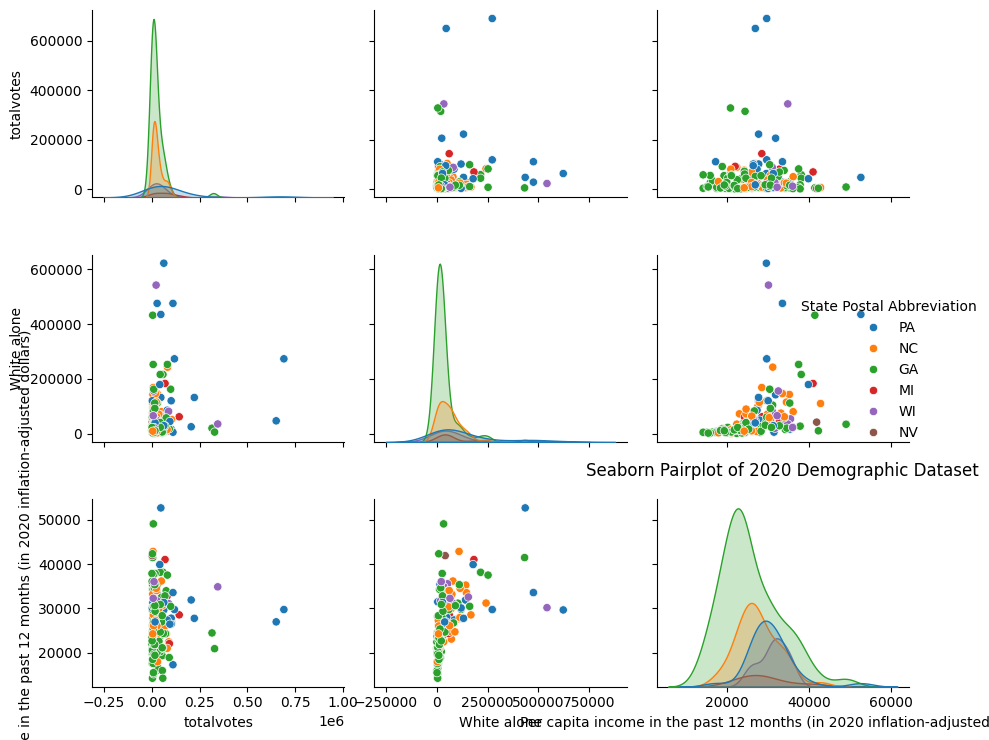

In [ ]:
# Create a pairplot with Seaborn
sns.pairplot(merged_data, hue = 'State Postal Abbreviation')
plt.title('Seaborn Pairplot of 2020 Demographic Dataset')
plt.tight_layout()
plt.show()